In [ ]:
# Code written by: Michael Bramble | michael.s.bramble@jpl.nasa.gov
# script for testing loading and overlay of USGS USMIN shapefiles
# 20240229 - initial version

In [1]:
import geopandas as gpd
import geodatasets
import contextily as cx
# import earthaccess
import os
# from osgeo import gdal
# import numpy as np
# import pandas as pd
# import xarray as xr
# from scipy.optimize import lsq_linear
import matplotlib.pyplot as plt
# import math
# import rasterio as rio
# import holoviews as hv
# import hvplot.xarray
# import netCDF4 as nc
# import sys
# sys.path.append('/Users/bramble/My Drive/_JPL_AMD/EMIT-Data-Resources-main/python/modules/')
# from emit_tools import emit_xarray
# import emit_tools

In [2]:
shapefile_024k_points = gpd.read_file("/Users/bramble/Documents/emit/gis/USGS_TopoMineSymbols_ver10_Shapefiles/USGS_TopoMineSymbols_24k_Points.shp")
shapefile_024k_polygons = gpd.read_file("/Users/bramble/Documents/emit/gis/USGS_TopoMineSymbols_ver10_Shapefiles/USGS_TopoMineSymbols_24k_Polygons.shp")
shapefile_048k_points = gpd.read_file("/Users/bramble/Documents/emit/gis/USGS_TopoMineSymbols_ver10_Shapefiles/USGS_TopoMineSymbols_48k_Points.shp")
shapefile_048k_polygons = gpd.read_file("/Users/bramble/Documents/emit/gis/USGS_TopoMineSymbols_ver10_Shapefiles/USGS_TopoMineSymbols_48k_Polygons.shp")
shapefile_625k_points = gpd.read_file("/Users/bramble/Documents/emit/gis/USGS_TopoMineSymbols_ver10_Shapefiles/USGS_TopoMineSymbols_625k_Points.shp")
shapefile_625k_polygons = gpd.read_file("/Users/bramble/Documents/emit/gis/USGS_TopoMineSymbols_ver10_Shapefiles/USGS_TopoMineSymbols_625k_Polygons.shp")
print(shapefile_024k_points)

       State               County      Ftr_Type       Ftr_Name  Ftr_Azimut  \
0         AK  Chugach Census Area          Adit  Big Four Mine           0   
1         AK  Chugach Census Area          Adit  Hercules Mine         342   
2         AK  Chugach Census Area          Adit     Giant Mine         180   
3         AK  Chugach Census Area          Adit      Cash Mine         186   
4         AK  Chugach Census Area          Adit          Mines         295   
...      ...                  ...           ...            ...         ...   
466742    WY                Crook  Uranium Mine           None           0   
466743    WY                Crook  Uranium Mine           None           0   
466744    WY                Crook  Uranium Mine           None           0   
466745    PR              Arecibo      Sand Pit           None           0   
466746    PR             Carolina        Quarry           None           0   

              Topo_Name  Topo_Date Topo_Scale CompiledBy Remark

In [3]:
# project shapefiles

# https://spatialreference.org/ref/epsg/4326/
proj = 4326
shapefile_625k_points = shapefile_625k_points.to_crs(proj)

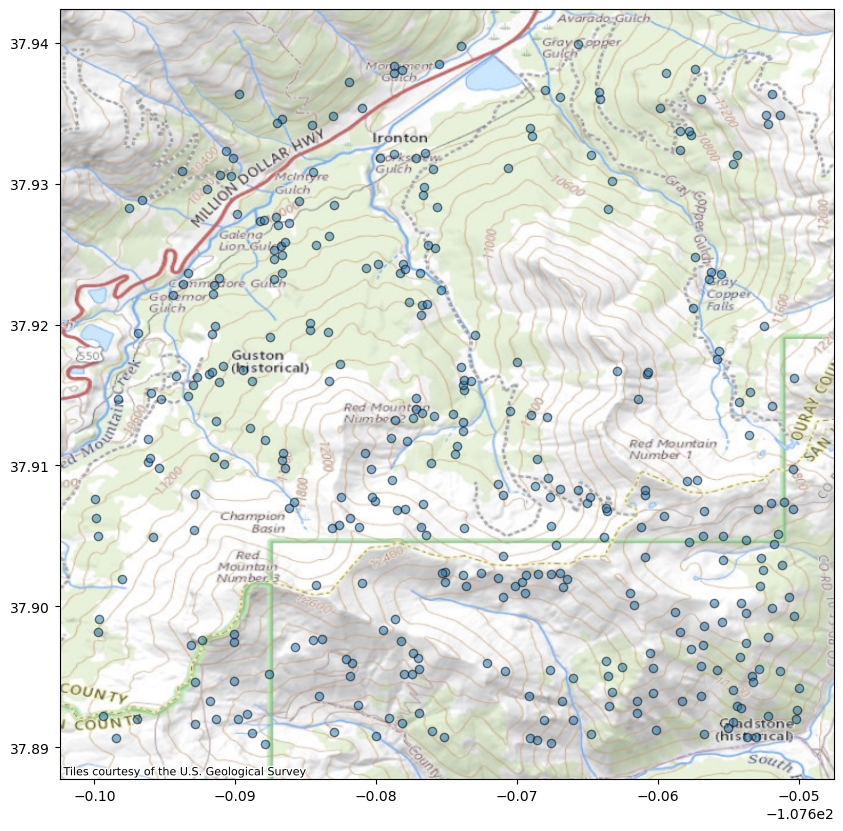

In [10]:
# shapefile_625k_points.plot()

# max_lat = 37.94
# min_lat = 37.89
# max_lon = -107.70
# min_lon = -107.65
north = 37.94
south = 37.89
west = -107.70
east = -107.65

shapefile_625k_points_clip = shapefile_625k_points.clip_by_rect(west, south, east, north)
ax = shapefile_625k_points_clip.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
# cx.add_basemap(ax, crs=shapefile_625k_points.crs)
# cx.add_basemap(ax, crs=shapefile_625k_points.crs, source=cx.providers.CartoDB.Positron)
# .text(x, y, info['LABELNAME'])
cx.add_basemap(ax, crs=shapefile_625k_points.crs, source=cx.providers.USGS.USTopo)


In [27]:
# quickly load an emit image for use
import earthaccess
import os
import numpy as np
import math
import xarray as xr
import holoviews as hv
import hvplot.xarray
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import earthpy.plot as ep
import sys
sys.path.append('/Users/bramble/My Drive/_JPL_AMD/EMIT-Data-Resources-main/python/modules/')
from emit_tools import emit_xarray

granule_asset_id_min = 'EMIT_L2B_MIN_001_20230628T161837_2317911_010.nc'
fp_min = f'/Users/bramble/Documents/emit/bonita_peak/{granule_asset_id_min}'
ds_geo_min = emit_xarray(fp_min, ortho=True)

# BONITA PEAK - WHOLE REGION
max_lat = 37.94
min_lat = 37.89
max_lon = -107.70
min_lon = -107.65

band = ds_geo_min.group_1_mineral_id
SliceData = band.sel({'latitude' : slice(max_lat, min_lat),
                      'longitude' : slice(max_lon, min_lon)})

In [29]:
SliceData.hvplot.image(cmap='viridis', aspect ='equal', rasterize=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'7f84479c-3e64-471e-bbbc-e80a85e4dea9': {'version…

Task exception was never retrieved
future: <Task finished name='Task-7' coro=<Callback.process_on_change() done, defined at /Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/holoviews/plotting/bokeh/callbacks.py:322> exception=UnsetValueError("figure(id='p1789', ...).inner_height doesn't have a value set")>
Traceback (most recent call last):
  File "/Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/holoviews/plotting/bokeh/callbacks.py", line 340, in process_on_change
    msg[attr] = self.resolve_attr_spec(path, cb_obj)
  File "/Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/holoviews/plotting/bokeh/callbacks.py", line 248, in resolve_attr_spec
    resolved = getattr(resolved, p, None)
  File "/Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/bokeh/core/property/descriptors.py", line 283, in __get__
    raise UnsetValueError(f"{obj}.{self.name} doesn't have a value set")
bokeh.core.property.descriptors.UnsetValue

In [42]:
# try using hvplot

import hvplot.xarray
import hvplot.pandas

# .cx[xmin:xmax, ymin:ymax]
# shapefile_625k_points.cx[min_lon:max_lon, min_lat:max_lat].hvplot(geo=True,tiles=True)
# SliceData.hvplot.image(cmap='viridis',aspect ='equal',rasterize=True) * shapefile_625k_points.cx[min_lon:max_lon, min_lat:max_lat].hvplot(geo=True)

SliceData.hvplot.image(cmap='viridis',aspect ='equal',rasterize=True) * shapefile_625k_points.cx[min_lon:max_lon,min_lat:max_lat].hvplot(c='Ftr_Type',geo=True)


BokehModel(combine_events=True, render_bundle={'docs_json': {'da3de302-fc76-4485-8a4c-f587c69bb454': {'version…

Task exception was never retrieved
future: <Task finished name='Task-146' coro=<Callback.process_on_change() done, defined at /Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/holoviews/plotting/bokeh/callbacks.py:322> exception=UnsetValueError("figure(id='p5146', ...).inner_height doesn't have a value set")>
Traceback (most recent call last):
  File "/Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/holoviews/plotting/bokeh/callbacks.py", line 340, in process_on_change
    msg[attr] = self.resolve_attr_spec(path, cb_obj)
  File "/Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/holoviews/plotting/bokeh/callbacks.py", line 248, in resolve_attr_spec
    resolved = getattr(resolved, p, None)
  File "/Users/bramble/opt/miniconda3/envs/emit/lib/python3.9/site-packages/bokeh/core/property/descriptors.py", line 283, in __get__
    raise UnsetValueError(f"{obj}.{self.name} doesn't have a value set")
bokeh.core.property.descriptors.UnsetVal

In [ ]:
# import USMIN database using WMS
# this is very close to working
# https://pypi.org/project/OWSLib/
# https://owslib.readthedocs.io/en/latest/usage.html#wms

import io
from owslib.wms import WebMapService
wms = WebMapService('https://mrdata.usgs.gov/services/wfs/usmin', version='1.3.0')

# # uncomment these to get info about the WMS database
# wms.identification.version
# wms.identification.title
# wms.identification.abstract
# list(wms.contents)
# wms['points'].title
# wms['points'].boundingBoxWGS84
# wms['points'].crsOptions
# wms['points'].styles
# [op.name for op in wms.operations]
# wms.getOperationByName('GetMap').formatOptions

# north = 37.94
# south = 37.89
# west = -107.70
# east = -107.65
north = 45
south = 30
west = -120
east = -100

img = wms.getmap(layers=['usmin'],
                 styles=['default'],
                 srs='EPSG:4326',
                 bbox=(west, south, east, north),
                 size=(600, 600),
                 format='image/png',
                 transparent=True
                 )


image = io.BytesIO(img.read())
data = plt.imread(image)


# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_axes([0, 0, 1, 1])
# ax.imshow(data,extent=(west, east, south, north))
# plt.show()

In [24]:
# import USMIN database using WFS
from owslib.wfs import WebFeatureService

wfs11 = WebFeatureService(url='https://mrdata.usgs.gov/services/wfs/usmin', version='1.1.0')

# wfs11.identification.title
# list(wfs11.contents)

# if interested in continuing:
# https://owslib.readthedocs.io/en/latest/usage.html#wfs

['polygons', 'points']

In [ ]:
# Read the data into GeoDataFrame:

import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
# url = "http://geo.stat.fi/geoserver/vaestoruutu/wfs"
url = "https://mrdata.usgs.gov/services/wfs/usmin"


# Initialize
wfs = WebFeatureService(url=url)




In [ ]:
import geopandas as gp
import requests
from fiona import BytesCollection    

# def wfs2gp_df(layer_name, url, bbox=None, wfs_version="2.0.0", outputFormat='application/gml+xml; version=3.2'):
#     params = dict(service='WFS', version=wfs_version,request='GetFeature', typeName=layer_name, outputFormat=outputFormat)
#     with BytesCollection(requests.get(url,params=params).content) as f:
#         df = gp.GeoDataFrame.from_features(f)
#     return df

def wfs2gp_df(layer_name, url, bbox=None, wfs_version="1.1.0", outputFormat='application/gml+xml; version=3.2'):
    params = dict(service='WFS', version=wfs_version,request='GetFeature', typeName=layer_name, outputFormat=outputFormat)
    with BytesCollection(requests.get(url,params=params).content) as f:
        df = gp.GeoDataFrame.from_features(f)
    return df

# wfs2gp_df('your_wfs_layer_name', 'your_wfs_url').head()

# wfs2gp_df('usmin', 'https://mrdata.usgs.gov/services/wfs/usmin').head()

In [ ]:
import geopandas as gpd
import requests
import geojson
# from pyproj import CRS
from owslib.wfs import WebFeatureService

# Specify the url for the backend.
# Here we are using data from Statistics Finland: https://www.stat.fi/org/avoindata/paikkatietoaineistot_en.html. (CC BY 4.0)
url = "https://mrdata.usgs.gov/services/wfs/usmin"

# Specify parameters (read data in json format).
params = dict(
    service="WFS",
    version="1.1.0",
    request="GetFeature",
    typeName="tilastointialueet:kunta4500k",
    outputFormat="json",
)

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson and set coordinate reference system
data = gpd.GeoDataFrame.from_features(geojson.loads(r.content), crs="EPSG:4326")

In [ ]:
#FOR WMS data
# https://geographyplanning.buffalostate.edu/wMix/python/Geopandas%20Basics%20using%20Open%20Data.html

import os
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

shp_url="https://mrdata.usgs.gov/services/usmin"
shp_gdf=gpd.read_file(shp_url)
shp_gdf.plot(column='points', figsize=(9,9));